# Gaussian Maximum Likelihood

##  MLE of a  Gaussian $p_{model}(x|w)$

You are given an array of data points called `data`. Your course site plots the negative log-likelihood  function for several candidate hypotheses. Estimate the parameters of the Gaussian $p_{model}$ by  coding an implementation that estimates its optimal parameters (15 points) and explaining what it does (10 points). You are free to use any Gradient-based optimization method you like.  

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
sns.set_theme(style='whitegrid', palette='pastel')

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression


- $lnL(\hat \mu,\sigma^2|Y) = {-N \over 2} ln(2\pi) - [\sum_{i=1}^N{1\over 2}ln \sigma ^2 - {1 \over 2 \sigma ^2} (Y_i - \mu)^2]$

- ${\partial ln L \over \partial \mu} = {1 \over \sigma^2} \sum_{i=1}^N(Y_i - \mu)$

- ${\partial ln L \over \partial \sigma ^2} = {1 \over 2 \sigma ^2} (-N + {1 \over \sigma^2} \sum_{n=1}^N(Y_i - \mu)^2)$

In [74]:
data = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]

# This function calculates the partial derivates of a negative log-likelihood function for the mean and variance
def gradient(mean, var, x):
  N = len(x)
  mean_gradient = (1 / var) * np.sum(x - mean) 
  var_gradient = (1 / (2 * var)) * (-N + (1 / var) * np.sum(np.subtract(x, mean) ** 2))
  return mean_gradient, var_gradient
  

# Performs a gradient descent using data, starting params, learning rate, and number of iterations.
# Each iteration changes theta partially based on the learning rate and eventually would converge towards
# the true params.
def gradient_descent(data, theta0, learning_rate, max_iter):
  mean, var = theta0
  x = np.array(data) # transform to numpy array for easier functions
  for _ in range(max_iter): 
    g = gradient(mean, var, x)
    
    # update params with calculated partial derivatives
    mean = mean + learning_rate * g[0] 
    var = var + learning_rate * g[1]
  return mean, var

In [75]:
iterations = 1000 # number of times we want to descent
theta = (0, 1) # (mean, var)
alpha = 0.01 # learning rate

# calculate params
e_mean, e_var = gradient_descent(data, theta, alpha, iterations)
mean = np.mean(data) # true mean from data
var = np.var(data) # true variance from data

print(f"Estimated params: mean={e_mean} variance={e_var}")
print(f"True params: mean={mean} variance={var}")

Estimated params: mean=6.214285714179054 variance=5.851817293989179
True params: mean=6.214285714285714 variance=5.882653061224489


## MLE of a conditional Gaussian $p_{model}(y|x,w)$

You are given a problem that involves the relationship between $x$ and $y$. Estimate the parameters of a $p_{model}$ that fit the dataset (x,y) shown below.   You are free to use any Gradient-based optimization method you like.  


$MSE = {1 \over n} \sum_{i=1}^n (y_i - \hat y_i)^2$ 

- $f(m, b) = {1 \over n} \sum_{i=1}^n (y_i - (mx_i+b))^2$

${\partial f \over \partial m} = {1 \over n} \sum_{i=1}^n -2x_i(y_i - (mx_i+b))$

${\partial f \over \partial b} = {1 \over n} \sum_{i=1}^n -2(y_i - (mx_i+b))$



In [76]:
x = np.array([8, 16, 22, 33, 50, 51])
y = np.array([5, 20, 14, 32, 42, 58])

# The goal here is to generate a p_model that is optimized for the following 
# linear regression: y = m * x + b
# Because we are provided x and y, we can use gradient descent and mean-squared
# error to optimize m and b. The code is attached below.
# An additional implementation using sklearn's Linear Regression is also included.
# y = m * x + b

def conditional_gradient(x, y, m, b):
  n = len(x)
  m_gradient = -2 * np.sum(x * (y - (m * x + b))) / n
  b_gradient = -2 * np.sum(y - (m * x + b)) / n
  return m_gradient, b_gradient
 
def conditional_gradient_descent(x, y, params, learning_rate, max_iter):
  m, b = params
  for _ in range(max_iter):
    g = conditional_gradient(x, y, m, b)

    m = m - learning_rate * g[0]
    b = b + learning_rate * g[1]
  return m, b

In [79]:
# The code below generates paramters from a self-implemented gradient descent
# as well as through `sklearn`'s LinearRegression package. It takes the calculated
# `m` and `b` and places them into the respective `estimate` and `actual` 
# functions

params = (0, 5)
iterations = 100
alpha = 0.0001

m, b = conditional_gradient_descent(x, y, params, alpha, iterations)

def estimate(x):
  return m * x + b

model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

def actual(x):
  return model.coef_[0] * x + model.intercept_

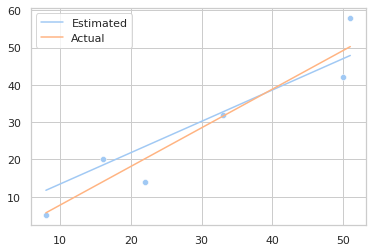

In [80]:
# The code below uses the previously calculated `estimate` and `actual` functions
# to generate a graph with the original data points as well as the estimated and
# actual lines.

sns.scatterplot(x=x, y=y)

start = min(x)
end = max(x)

pp1, pp2 = (start, estimate(start)), (end, estimate(end))
ap1, ap2 = (start, actual(start)), (end, actual(end))

plt.plot([pp1[0], pp2[0]], [pp1[1], pp2[1]], label='Estimated')
plt.plot([ap1[0], ap2[0]], [ap1[1], ap2[1]], label='Actual')
plt.legend(loc="upper left")

plt.show()